# Pytorchのnnモジュール

## nn.Linear

In [1]:
from torch import nn
import torch
from torch.nn import functional as F
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
linear = nn.Linear(64, 30)

In [3]:
list(linear.parameters())

[Parameter containing:
 tensor([[ 0.1020,  0.1025,  0.1057,  ...,  0.0591,  0.0630,  0.0757],
         [ 0.0874, -0.0131, -0.0675,  ...,  0.1167,  0.0074, -0.1079],
         [ 0.0613,  0.0501, -0.0268,  ...,  0.0721, -0.1211, -0.0892],
         ...,
         [ 0.0565, -0.0948, -0.0622,  ...,  0.0782, -0.1138,  0.0827],
         [ 0.0479,  0.1201, -0.0398,  ..., -0.0326, -0.0201,  0.0278],
         [ 0.0373, -0.0710, -0.0453,  ...,  0.0695, -0.0716,  0.0711]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0907,  0.0197, -0.1081,  0.0799, -0.1172, -0.0890,  0.0351, -0.0980,
          0.1245, -0.1144,  0.0856, -0.0506, -0.0930,  0.0557,  0.0779,  0.0777,
          0.0219,  0.0529, -0.0377, -0.0667,  0.1007,  0.0241,  0.0571, -0.0919,
         -0.0006,  0.0233,  0.0144, -0.0449,  0.0709,  0.0904],
        requires_grad=True)]

In [5]:
linear.weight.shape

torch.Size([30, 64])

In [5]:
linear.bias

Parameter containing:
tensor([ 0.0029,  0.0537, -0.1064,  0.0450,  0.1078,  0.0603,  0.1103,  0.0351,
        -0.0222,  0.0227, -0.0088,  0.0681,  0.0221, -0.1046,  0.1136, -0.1058,
        -0.0058, -0.0423, -0.0224,  0.0912, -0.0777,  0.0364,  0.1091,  0.0407,
        -0.0270, -0.0865, -0.0208, -0.0560, -0.0938, -0.0933],
       requires_grad=True)

In [8]:
linear.weight.shape # 出力×入力

torch.Size([30, 64])

In [7]:
linear.bias.shape

torch.Size([30])

In [10]:
X = torch.randn((5, 64))
z = linear(X)

In [11]:
z

tensor([[ 1.1043,  0.2538,  0.0149,  0.4746,  1.0202, -0.4955, -0.6380, -0.2354,
          0.0440, -0.1236,  0.3369,  0.5708, -0.0266, -0.4177, -0.0978,  0.2033,
          0.4010, -0.0261, -1.1955,  0.0285, -0.2139,  0.2234,  0.3487,  0.3748,
         -0.2650,  0.1134,  0.1150, -0.7471,  0.0942, -0.7808],
        [-0.5987,  0.0250, -0.9097,  0.2593, -0.1654, -0.3981,  0.8592, -0.1029,
         -0.0842,  1.3627,  0.4819,  0.7540,  0.6006,  0.4341, -0.0192, -0.3938,
         -0.4958,  0.1797, -0.3430,  1.2453, -1.1131, -0.0714,  0.0860,  0.6582,
         -0.3360, -0.2641,  0.0326, -0.5758, -0.1988, -0.5971],
        [-0.3337, -0.4816, -0.0677,  0.5255,  0.0029,  0.8024, -0.0829, -0.2933,
          0.0243, -0.3491, -0.5271, -0.1724,  0.2385, -0.3965,  0.8949, -1.0141,
         -0.1645, -0.0764,  0.0148, -0.1879,  0.1609, -0.5597,  0.2238,  0.5898,
         -1.2125,  0.1743, -0.9766,  0.2086,  0.6127, -0.3867],
        [-0.5962, -0.0375,  0.2762, -0.8362, -0.8392, -0.0791,  0.0809, -0.4923

In [13]:
z.shape

torch.Size([5, 30])

## MLP実装

### クラスと関数を組み合わせる

In [17]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden) # 隠れ層(第1層)を定義
        self.l2 = nn.Linear(num_hidden, num_out) # 隠れ層(第2層)を定義

    def forward(self, x):
        # z1 = self.l1(x) 
        # a1 = F.relu(z1)
        # z2 = self.l2(a1)
        x = self.l2(F.relu(self.l1(x)))
        return x

In [16]:
model = MLP(64, 30, 10)

In [21]:
X = torch.randn(5, 64)
Z = model(X) # .__call__というメソッドが呼ばれ、forward()が実行された(nn.Moduleでそういうロジックになっている)(継承してる)

In [22]:
Z.shape

torch.Size([5, 10])

### nn.クラスのみで構成するケース

In [28]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden) # 隠れ層(第1層)を定義
        self.l2 = nn.Linear(num_hidden, num_out) # 隠れ層(第2層)を定義
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.l2(self.relu(self.l1(x)))
        return x
    

In [29]:
model = MLP(64, 30, 10)
X = torch.randn(5, 64)
Z = model(X)

In [30]:
Z.shape

torch.Size([5, 10])

### nn.Sequentialを使ったケース

In [32]:
num_in = 64
num_hidden = 30
num_out = 10

model = nn.Sequential(
    nn.Linear(num_in, num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden, num_out)
)

In [33]:
Z = model(X)

In [34]:
Z.shape

torch.Size([5, 10])

### MLP学習

In [55]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden) # 隠れ層(第1層)を定義
        self.l2 = nn.Linear(num_hidden, num_out) # 隠れ層(第2層)を定義

    def forward(self, x):
        # z1 = self.l1(x) 
        # a1 = F.relu(z1)
        # z2 = self.l2(a1)
        x = self.l2(F.relu(self.l1(x)))
        return x

# データ準備
dataset = datasets.load_digits()
data = dataset['data']
target = dataset['target']
images = dataset['images']

# バリデーションデータ作成
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size = 0.2, random_state = 0)
# 前処理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 64))
X_val = scaler.transform(X_val.reshape(-1, 64))
X_train = torch.tensor(X_train, dtype = torch.float32).reshape(-1, 64)
X_val= torch.tensor(X_val, dtype = torch.float32).reshape(-1, 64)
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)

# モデル設定
batch_size = 30
learning_rate = 0.03
train_losses = []
val_losses = []
val_accuracies = []
nh = 30
m, n = X_train.shape
num_classes = 10
num_batches = np.ceil(X_train.shape[0] / batch_size).astype(int)
# モデル初期化
model = MLP(n, nh, num_classes)

# モデル学習
for epoch in range(100):
    shuffled_indices = np.random.permutation(len(y_train))
    running_loss = 0.0
    
    for n in range(num_batches):
        start_index = n * 30
        end_index = start_index + 30

        X = X_train[shuffled_indices[start_index:end_index]]
        y = y_train[shuffled_indices[start_index:end_index]]
        preds = model(X)
        loss = F.cross_entropy(preds, y)
        running_loss += loss.item()

        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        model.zero_grad()

    # validation
    with torch.no_grad():
        preds_val = model(X_val)
        loss_val = F.cross_entropy(preds_val, y_val)
        accuracy_val = torch.sum(torch.argmax(preds_val, dim = 1) == y_val) / y_val.shape[0]

    train_losses.append(running_loss / num_batches)
    val_losses.append(loss_val.item())
    val_accuracies.append(accuracy_val)
    print(f'epoch:{epoch}, train_loss:{train_losses[-1]}, val_losses:{val_losses[-1]}, val_accuracy:{val_accuracies[-1]}')

epoch:0, train_loss:2.091760722299417, val_losses:1.897878646850586, val_accuracy:0.5777778029441833
epoch:1, train_loss:1.6424906825025876, val_losses:1.4792919158935547, val_accuracy:0.675000011920929
epoch:2, train_loss:1.2183341085910797, val_losses:1.1116065979003906, val_accuracy:0.7444444298744202
epoch:3, train_loss:0.8936007668574651, val_losses:0.843284010887146, val_accuracy:0.7833333611488342
epoch:4, train_loss:0.6773188542574644, val_losses:0.6643317937850952, val_accuracy:0.8388888835906982
epoch:5, train_loss:0.5351815354079008, val_losses:0.5436503291130066, val_accuracy:0.8694444298744202
epoch:6, train_loss:0.43673677525172633, val_losses:0.454429030418396, val_accuracy:0.8972222208976746
epoch:7, train_loss:0.3631741472830375, val_losses:0.3875693380832672, val_accuracy:0.9194444417953491
epoch:8, train_loss:0.3072711753969391, val_losses:0.33847716450691223, val_accuracy:0.9277777671813965
epoch:9, train_loss:0.2652244511991739, val_losses:0.3011845350265503, val_a

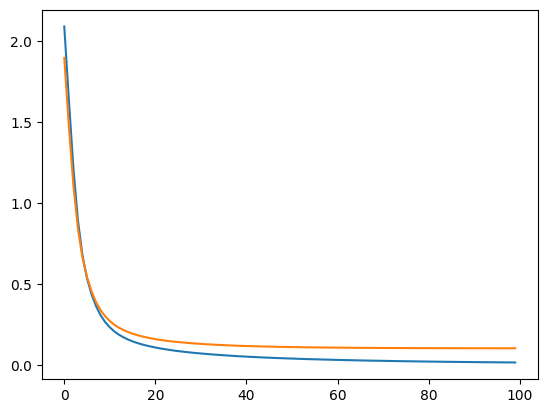

In [56]:
plt.plot(train_losses)
plt.plot(val_losses)

In [62]:
for param in model.parameters():
    print(param.shape)

torch.Size([30, 64])
torch.Size([30])
torch.Size([10, 30])
torch.Size([10])


In [63]:
for name, param in model.named_parameters():
    print(name, param.shape)

l1.weight torch.Size([30, 64])
l1.bias torch.Size([30])
l2.weight torch.Size([10, 30])
l2.bias torch.Size([10])


### コンポーネントのイテレーション

In [65]:
for module in model.children():
    print(module)

Linear(in_features=64, out_features=30, bias=True)
Linear(in_features=30, out_features=10, bias=True)


In [66]:
for name, module in model.named_children():
    print(name, module)

l1 Linear(in_features=64, out_features=30, bias=True)
l2 Linear(in_features=30, out_features=10, bias=True)


In [67]:
for module in model.modules():
    print(module)

MLP(
  (l1): Linear(in_features=64, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=10, bias=True)
)
Linear(in_features=64, out_features=30, bias=True)
Linear(in_features=30, out_features=10, bias=True)


In [68]:
for name, module in model.named_modules():
    print(name)


l1
l2
